# Neural Networkds Overview

The neural networks looks like the following: 
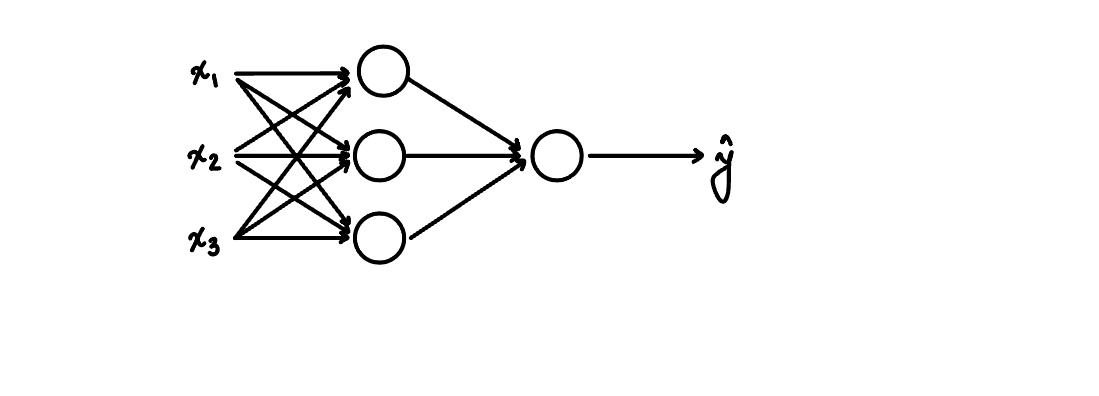

The central node corresponds the z-like calculation like $z = w^Tx + b$ as as well as a-like calculation, $a=\sigma(z)$. The next node on the right, in the second layer also corresponds a similar z-like and a-like calculations.

The first layes is called the input layer and is not considered to be the first layer. The second layer is called the hidden layer and is considered to be the first layer. The last layer is the output layer and is he second layer.

Previously, we used $X =$ matrix containing the values os $x^{(i)}$. Here, we will change the notation a bit and will call $a^[0] = X$ for the input layer. This term "a" also stands for activations. 
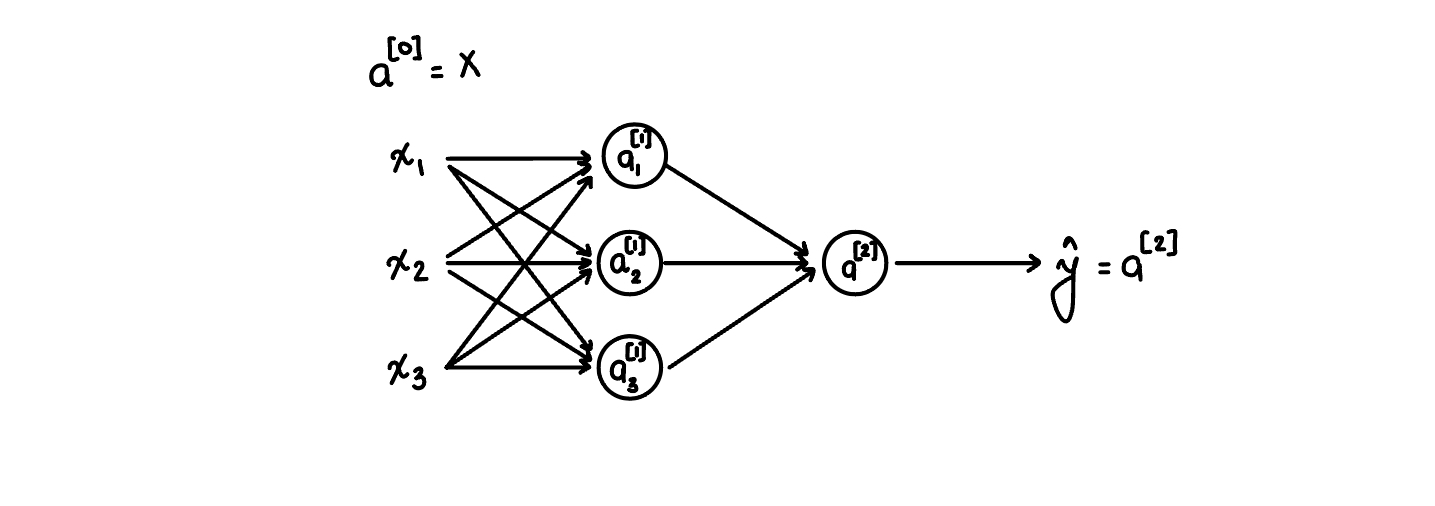

The superscript represents the layer the calculations are being performed. We can write $a^{[1]} = \begin{pmatrix} a^{[1]} \\ a^{[2]} \\ a^{[3]} \end{pmatrix} $

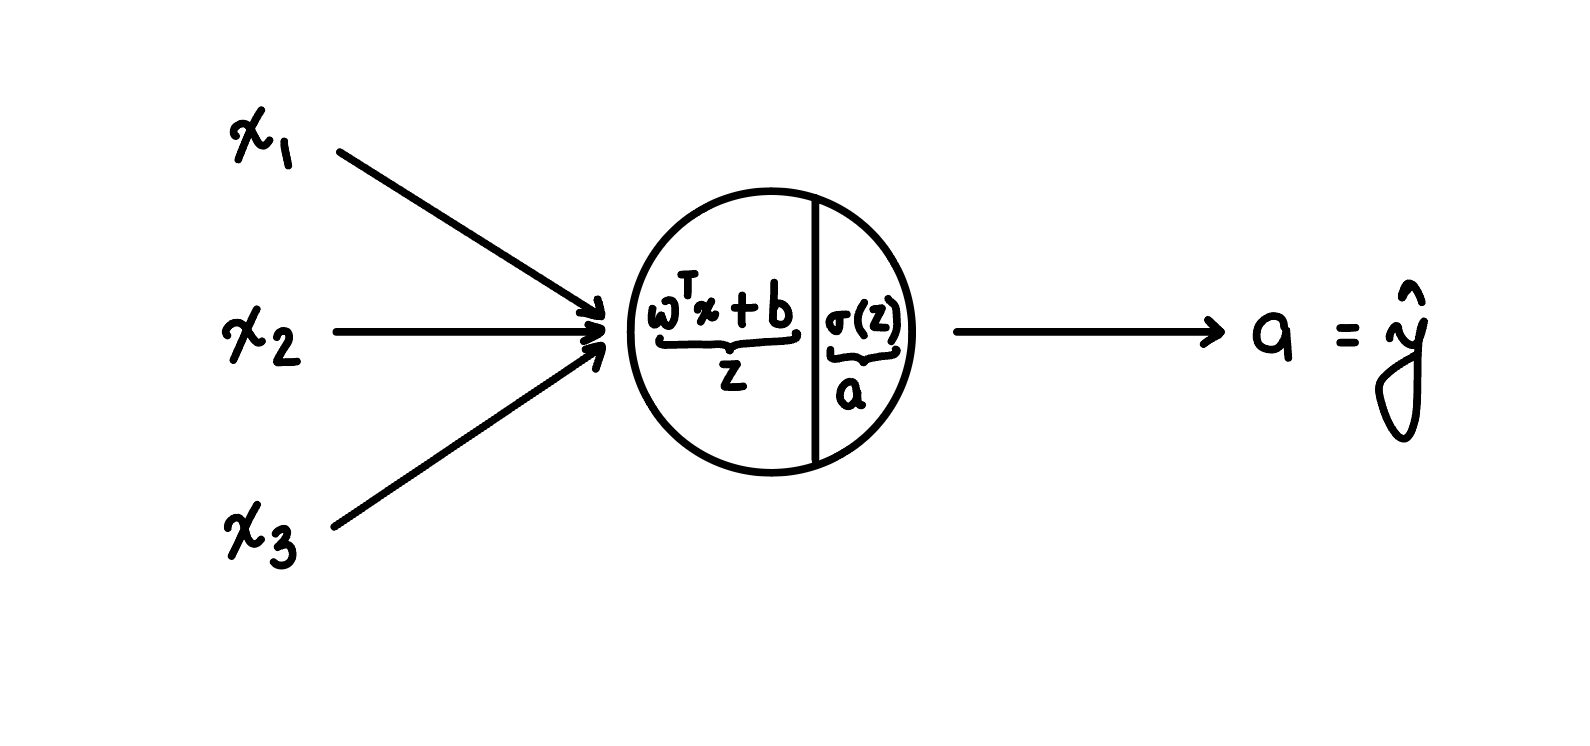

As we studied in the first section, the circle in the logistic regression represents two steps of computations: we compute $z = w^T x+ b$ and $a = \sigma(z)$. So a neural network does this a lot more times.

If we have a neural network of 4 nodes in the hidden layer, then we will have the following equation to compute 

$$ 
z_1^{[1]} = w_1^{[1]T}x + b_1^{[1]}, \quad a_1^{[1]} = \sigma(z_1^{[1})\\
z_2^{[1]} = w_2^{[1]T}x + b_2^{[1]}, \quad a_2^{[1]} = \sigma(z_2^{[1})\\
z_3^{[1]} = w_3^{[1]T}x + b_3^{[1]}, \quad a_3^{[1]} = \sigma(z_3^{[1})\\
z_4^{[1]} = w_4^{[1]T}x + b_4^{[1]}, \quad a_4^{[1]} = \sigma(z_4^{[1]})
$$

# Vectorizing across multiple examples

We can vectorize this above system of equations as 

$$
\begin{bmatrix}
w_1^{[1]T} X + b_1^{[1]}\\
w_2^{[1]T} X + b_2^{[1]}\\
w_3^{[1]T} X + b_3^{[1]}\\
w_4^{[1]T} X + b_4^{[1]}
\end{bmatrix}
= 
\begin{bmatrix}
z_1^{[1]}
z_2^{[1]}
z_3^{[1]}
z_4^{[1]}
\end{bmatrix}
$$

The above layer was the hidden layer or the first layer. Now lets talk about the second layer
$$
X \rightarrow z^{[2]} = \hat{y}
$$

Given a input feature vector X, we predict the $\hat{y}$. Indiviually, it becomes
$$
x^{(1)} \rightarrow a^{[2](1)} = \hat{y}^{(1)}\\
x^{(2)} \rightarrow a^{[2](2)} = \hat{y}^{(2)}\\
\vdots \\
x^{(m)} \rightarrow a^{[2](m)} = \hat{y}^{(m)}
$$

The round bracket represents the training example and the square bracket represents the layer we are at.

Now, to subsitute the the indiviudal examples in the system of equations, we need a for loop, but instead we will write everything in the vector form to eliminate the use of for looop. Thus we get 

$$
z^{[1]} = w^T X + b^{[1]}\\
A^{[1]} = \sigma(z^{[1]})\\
z^{[2]} = w^T X + b^{[2]}\\
A^{[2]} = \sigma(z^{[2]})
$$


where 
$$
Z^{[1]} = \begin{bmatrix} 
\vdots  & \vdots & \ldots & \vdots\\
z^{[1](1)} & z^{[1](2)} & \ldots & z^{[1](m)}\\
\vdots  & \vdots & \ldots & \vdots
\end{bmatrix}
$$
and
$$
A^{[1]} = \begin{bmatrix} 
\vdots  & \vdots & \ldots & \vdots\\
a^{[1](1)} & a^{[1](2)} & \ldots & a^{[1](m)}\\
\vdots  & \vdots & \ldots & \vdots
\end{bmatrix}
$$

One property of this notation is that this matrices, Z and A is that horizontally, we are going to index across training examples and vertically we are going to index acorss different nodes in the neural network. For example, the $(1,1)$ index in the A matrix corresponds to the first hidden unit on the first training example. The index $(2,1)$ in the matrix A corresponds to the acitivation in the second hidden layer on the first training example. The simliar intuition corresponds to the matrices of Z and X.

# Acitvation Functions

Given $x$:

$$
z^{[1]} = w^T X + b^{[1]}\\
A^{[1]} = \sigma(z^{[1]})\\
z^{[2]} = w^T X + b^{[2]}\\
A^{[2]} = \sigma(z^{[2]})
$$

Here the sigmoid function is called the activation function and it has a S shaped graph (recall logistic regression).

However, we can change the acitivation functions according to our convience.

Let's say we can have a different function, $g(z)$. This function could be a linear, non-linear function. The property of the sigmoid function is that it goes between 0 and 1. A function that works better that the sigmoid function and goes between 0 and 1 is the hyperbolic tangent function.

If we use the hyperbolic tangent function, it almost always work better than the sigmoid function because the mean of the activations that come out of the hidden layer are closer to having a mean of zero.

One downside of both the sigmoid function and the $tan\ h$ function is that if $z$ is either very large or very small, then the gradient of the derivative of the slope of this function becomes very small.

So one other cohice othat is very popular in machine learning is called "Rectified Linear Unit." The function or the value looks like this:

$$
a= \text{max}(0,z)
$$



The derivatives of the slope is 1 as long as z is positive and derivative of the slope is 0 when z is negative.

Rules of thumb for choosing the acitivaion functions:
* If your ouput is 0 or 1 (binary values) or if you are using binary classification, then the sigmoid function is very natural choice for the ouput layer.
* For all other units, ReLu is increasinly the default choice. So if youre not sure what to use, for your hidden layers, use ReLu.

One disadvantange of ReLu is that the derivative is equal to 0 when z is negative. In practice this works just fine. But there is another version of the value called the Leaky ReLU.

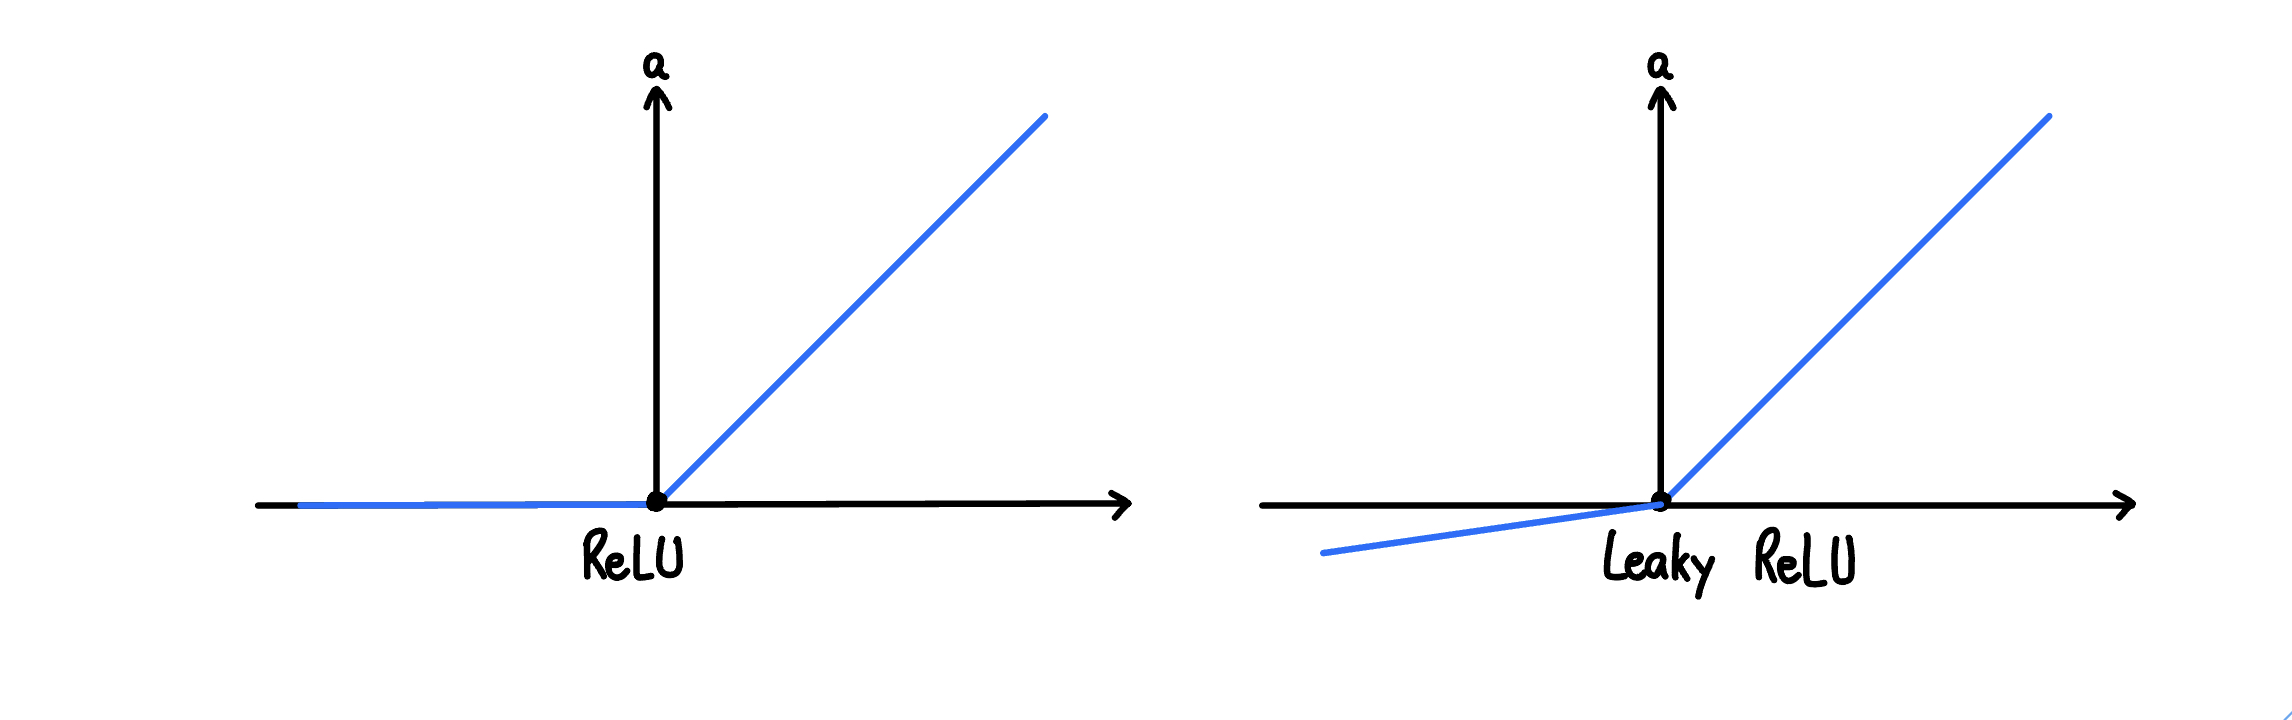

Either one works fine as both works equivalently good in pracitice.

Pros and Cons of Acitivation Functions: 
* Sigmoid Function: 
$$ a = \frac{1}{1 + e^{-z}} $$
Probably never use this in practice.

* Hyperbolic Tangent Function
$$ tanh(a) = \frac{e^x - e^{-z}}{e^z + e^{-z}} $$
The reaons not to use the sigmoid function is that $tanh$ is pretty much strictly superior.

* ReLU
$$ a = max(0,z)$$
Most commonly used function in neural networks

* Leaky ReLU
$$ a = max(0.01z, z)$$

# Why do you need non-linear Activation function

Given $x$:

$$
z^{[1]} = w^T X + b^{[1]}\\
A^{[1]} = g(z^{[1]})\\
z^{[2]} = w^T X + b^{[2]}\\
A^{[2]} = g(z^{[2]})
$$

If the function $g(z^{[1]}) = z^{[1]}$, a linear function, then the whole purpose of neural function disappears because then we will only be calculating nothing more than a linera functions and the hidden layers will disappear. 

If we have linear activation function in the hidden layers and a sigmoid activation function in the ouput layer, then we will simply be applying nothing than a logistic regression algorithm.

# Derivaties of the Acitivation Functions

* Sigmoid Function
$$
\frac{d}{dz}g(z) = \frac{d}{dz} (\frac{1}{1+e^{-z}})\\
 = \frac{1}{1+e^{-z}}(1-\frac{1}{1+e^{-z}})\\
 = g(z)(1-g(z))
$$

* Tanh Activation Function
$$
\frac{d}{dz}g(z) = \frac{d}{dz} tanh(z))\\
 = 1- (tanh(z))^2\\
$$

* ReLu
$$
\begin{equation}
g(z) = \text{max}(0,z)\\
g'(z) =
\begin{cases}
        0 & \text{if } z \leq 0\\
        1 & \text{if } z \geq 0\\
        \text{undefined} & \text{if } z= 0
\end{cases}
\end{equation}
$$
Take $g'(z)$ at $z=0$ to be 0.

* Leaky ReLu
$$
\begin{equation}
g(z) = \text{max}(0.001z,z)\\
g'(z) =
\begin{cases}
        0.001 & \text{if } z \leq 0\\
        1 & \text{if } z \geq 0
\end{cases}
\end{equation}
$$


# Gradient Descent for Neural Networks

The Neural network with a single hidden layer will have the following parameters: 
$$ 
w^{[1]}, \quad b^{[1]}, \quad w^{[2]}, \quad b^{[2]} \\
n_x \text{ or } n^{[0]} = \text{ number of input features}\\
n^{[1]} = \text{ number of hidden units}\\
n^{[2]} = \text{ number of output features}
$$
For example, if $n^{[2]} = 1$, then the matrix, $w^{[1]}$ will be $(n^{[1]} \times n^{[0]})$.

$b^{[1]}$ will be a $(n^{[1]}, 1)$ dimensional vector (column vector).

$w^{[2]}$ will be a $(n^{[2]}), n^{[1]}$ and $b^{[2]}$ will be $(n^{[2]}, 1)$. 

So far, we have only seen examples where number of hidden units is 1.

Let's assume that we are doing binary classification. We will have a cost function, 

$$ J(w^{[1]}, b^{[1]}, w^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i=1}^{m} ()L(\hat{y}, y) $$

If we are doing binary classification, then the loss function can be the loss function that we get in Logistic regression.

## Gradient Descent 

After initializing the parameters, gradient descent computes the predictions.
$$ 
\text{Repeat}\{ \\
\text{compute predictions } (\hat{y},\ i = 1, \dots, m)\\
dw^{[1]} = \frac{\partial J}{\partial w^{[1]} }, \quad db^{[1]} = \frac{ \partial J}{ \partial b^{[1]}}, \dots (\text{same for other two parameters})\\
w^{[1]} = w^{[1]} - \alpha\ dw^{[1]}\\
b^{[1]} = b^{[1]} - \alpha\ db^{[1]}\\
w^{[2]} = w^{[2]} - \alpha\ dw^{[2]}\\
b^{[2]} = b^{[2]} - \alpha\ db^{[2]}\\
\}
$$
We already know how to compute predictions, so the key is to know how to calculate partial derivatives

### Formula for computing derivatives

For Forward Propogation:s
$$
z^{[1]} = w^T X + b^{[1]}\\
A^{[1]} = g(z^{[1]})\\
z^{[2]} = w^T X + b^{[2]}\\
A^{[2]} = g(z^{[2]})
$$

The derivatives will be computed in the next step, the backward propogation:

(The below is vectorized)
$$ 
dZ^{[2]} = A^{[2]} - Y\\
dw^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]}T\\
db^{[2]} = \frac{1}{m} \text{np.sum }(dz^{[2]}, \text{axis}=1, \text{keepdims=TRUE})\\
dZ^{[1]} = w^{[2]} dZ^{[2]}  \times g^{[1]'}(Z^{[1]}) (\text{element wise product})\\
dw^{[1]} = \frac{1}{m} dZ^{[1]}X^T\\
db^{[1]} = \frac{1}{m} \text{ np.sum}(dz^{[1]}, \text{axis}=1, \text{keepdims=TRUE})
$$

* np.sum is used for summing across one-dimensional of a matrix
* keepdims=TRUE prevents python from outputting one rank arrays of dimensions (n,). It ensures that python ouputs the calculations in $(n^{[2]},1)$ dimensions.


# Random Initialization

If we initialize $w^{[1]}=0$ matrix, then we will be computing the same activations functions at different layes in the networks. So it is important to randomly initialize the parameters.

$w^{[1]}=$np.random.randn((2,2)) $\times$ 0.01.

$b^{[1]}$ and $b^{[2]}$ does not have a problem of randomly intializing.

$w^{[2]}$= randomly initialize it.

